# 14-2 Matplotlib -- Bar graphs, Histograms, 3D plots, ...

In [12]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

## Bar, histograms

In [61]:
# Get a dictionaries whose keys: values pairs are the columns of the grade files a
gradefile = '1mp3-midterm-1-marks-anon.csv'
f = open(gradefile,'r')
keys = f.readline()[:-1].split(', ')
# print(keys)
f.close()
grades = np.loadtxt(gradefile, delimiter = ',', skiprows=1)
GradesDict = {}
for i,k in enumerate(keys):
    GradesDict[k] = grades[:,i]
print(GradesDict.keys())

dict_keys(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'MC-1', 'MC-2', 'MC-3', 'MC-4', 'MC-5', 'MC-6', 'MC-7', 'MC-8', 'MC-9', 'MC-10', 'MC-11', 'MC-12', 'MC-13', 'MC-14', 'MC-15', 'MC-total', 'Total Points'])


In [109]:
# plot the grade distribution of question1
def bin(grades, gmin, gmax, n):
    '''
    bins grades into n bins
    '''
    cutoffs = np.linspace(gmin, gmax, n+1)
    bins = np.zeros(n,dtype=int)
    # bins[0] = len([g for g in grades if g == cutoffs[0]])
    for i in range(n):
        bins[i] = len([g for g in grades if g >= cutoffs[i] and g < cutoffs[i+1]])
    bins[-1] += len([g for g in grades if g == cutoffs[-1]])
    return bins, cutoffs


[ 0.          0.91666667  1.83333333  2.75        3.66666667  4.58333333
  5.5         6.41666667  7.33333333  8.25        9.16666667 10.08333333
 11.        ] 13
[ 5  0  0  0 21  0  0 12  0 16  0 22] 12
[ 0.          0.91666667  1.83333333  2.75        3.66666667  4.58333333
  5.5         6.41666667  7.33333333  8.25        9.16666667 10.08333333
 11.        ] 13
[ 5  0  0  0 21  0  0 12  0 16  0 22] 12


(np.float64(0.0), np.float64(11.0), np.float64(0.0), np.float64(20.0))

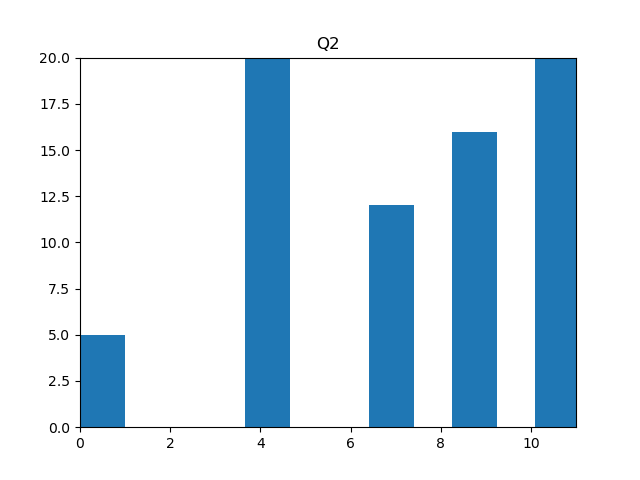

In [ ]:
key = 'Q2'
fig, ax = plt.subplots()
binnedGrades, cutoffs = np.histogram(GradesDict[key], bins=12, range=(0,11))
# binnedGrades, cutoffs = bin(GradesDict[key], 0, 11, 12)

ax.bar(cutoffs[:-1],binnedGrades,align='edge', width=1)
ax.set_title(key)
ax.axis([0,11,0,20])


10


(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(20.0))

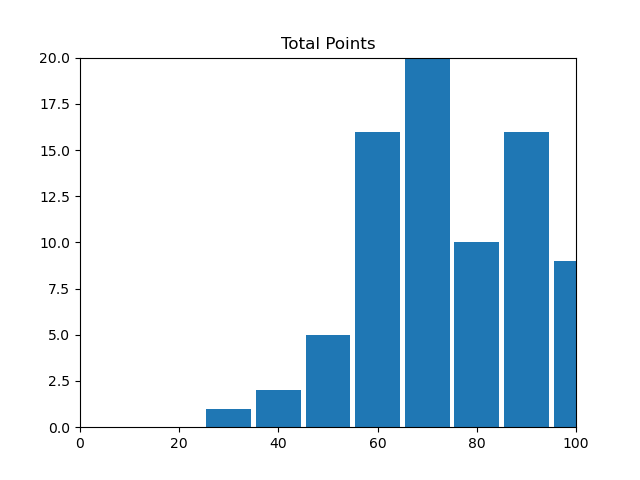

In [118]:
key = 'Total Points'
fig, ax = plt.subplots()
bins, cutoffs = np.histogram(GradesDict[key], bins=10, range=(0,100))
print(len(bins))
ax.bar(cutoffs[1:],bins,align='center', width=9)
ax.set_title(key)
ax.axis([0,100,0,20])

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(20.0))

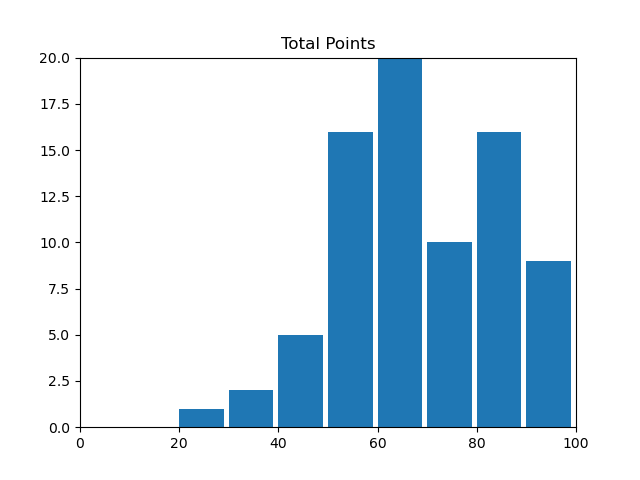

In [84]:
#The easy way:
key = 'Total Points'
fig, ax = plt.subplots()
ax.hist(GradesDict[key],bins=10,range = (0,100),width=9)
ax.set_title(key)
ax.axis([0,100,0,20])


## plot a table of values

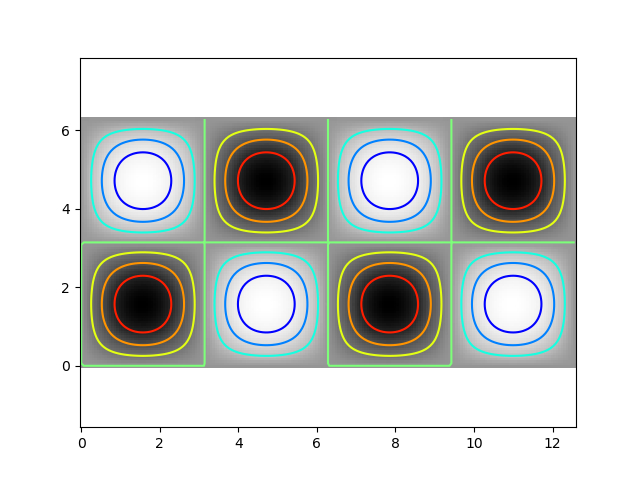

In [188]:
from matplotlib import colormaps

n = 101
x = np.linspace(0,4*np.pi,2*n)
y = np.linspace(0,2*np.pi,n)
X, Y = np.meshgrid(x, y)
f = np.sin(X) * np.sin(Y)

fig, ax = plt.subplots()
ax.axis('equal')
ax.pcolor(X,Y,f,cmap='Grays')
ax.contour(X,Y,f,cmap='jet')


## 3d plots

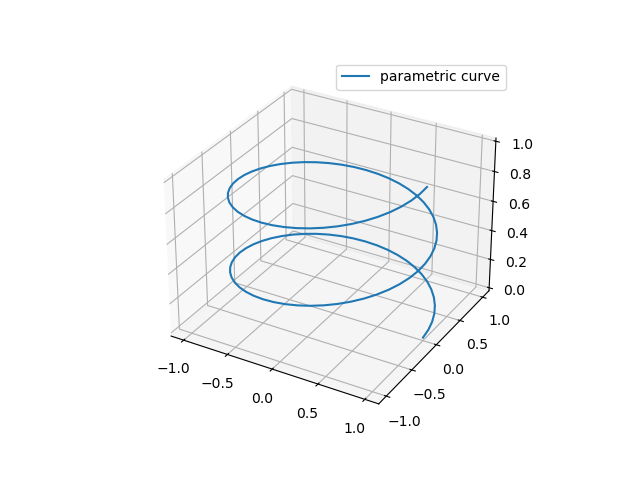

In [ ]:
t = np.linspace(0,4*np.pi,101)
X = np.cos(t)
Y = np.sin(t)
Z = t/4/np.pi

fig = plt.figure() 
ax = fig.add_subplot(projection='3d')

ax.plot(X, Y, Z, label='parametric curve')
ax.legend()


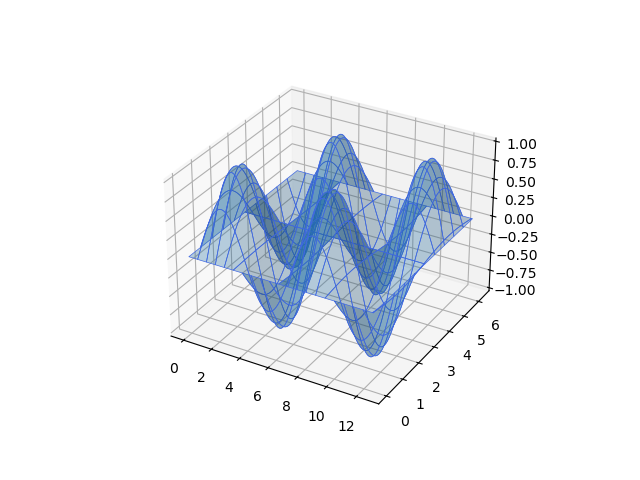

In [192]:

n = 101
x = np.linspace(0,4*np.pi,2*n)
y = np.linspace(0,2*np.pi,n)
X, Y = np.meshgrid(x, y)
f = np.sin(X) * np.sin(Y)

fig = plt.figure() 
ax =fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f,edgecolor='royalblue', lw=0.5, rstride=10, cstride=10, alpha=0.3)


/var/folders/g3/kk2tnrxs20b0r_ms_czcr23c0000gp/T/ipykernel_27425/858274613.py:3: UserWarning: linewidths is ignored by contourf
  ax.contourf(X,Y,f, linewidths=3, cmap='jet')


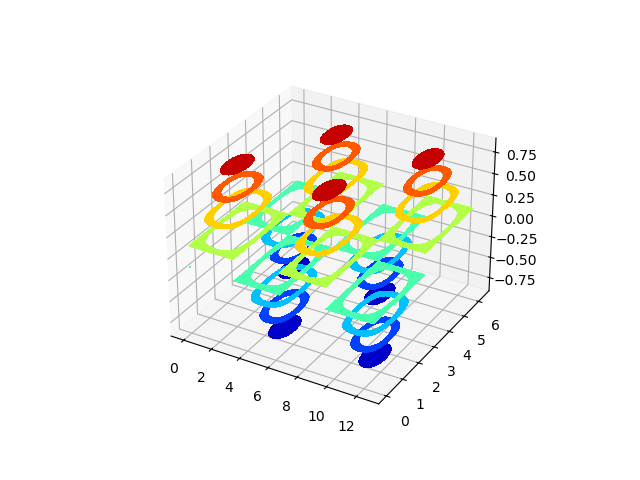

In [194]:
fig = plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.contourf(X,Y,f, linewidths=3, cmap='jet')
